Work with the CodeProject.AI Server face API. 

In [57]:
import codeprojectai.core as cpai
from PIL import Image, ImageDraw, ImageFont
import pprint
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [58]:
IP = 'localhost'
PORT = '32168'
TIMEOUT = 20 # Default is 10

## Face API
Run with (in Windows): 
```
docker run --name CodeProject.AI-Server -d -p 32168:32168 ^
  --mount type=bind,source=C:\ProgramData\CodeProject\AI\docker\data,target=/etc/codeproject/ai ^\n
  --mount type=bind,source=C:\ProgramData\CodeProject\AI\docker\modules,target=/app/modules ^\n
  codeproject/ai-server"\n"
```
See [docs](https://www.codeproject.com/ai/docs/why/running_in_docker.html) for Linux and macOS instructions

In [59]:
cpaiface = cpai.CodeProjectAIFace(IP, PORT, TIMEOUT)
print(cpaiface.port)

32168


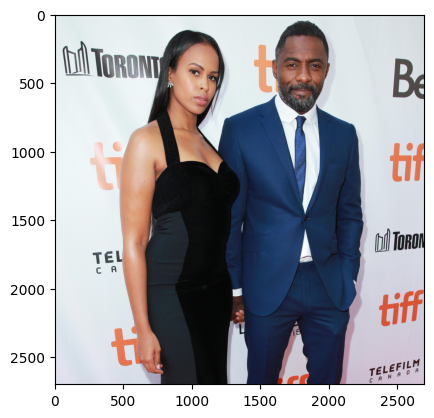

In [60]:
image_path = 'tests/images/couple.jpg'
im = Image.open(image_path)
plt.imshow(im);

## Face detection
Detect faces, but do not recognise them, quite fast.

In [61]:
%%time
try:
    with open(image_path, "rb") as image_bytes:
        predictions = cpaiface.detect(image_bytes)
except cpai.CodeProjectAIException as exc:
    print(exc)

CPU times: user 7.44 ms, sys: 2.91 ms, total: 10.3 ms
Wall time: 302 ms


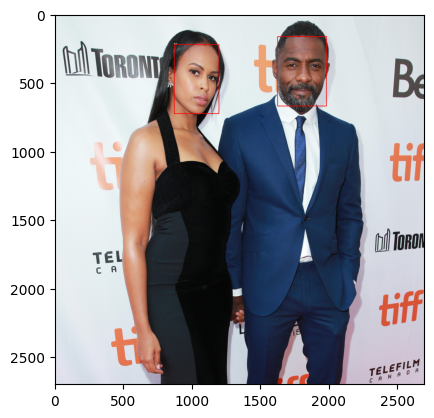

In [62]:
len(predictions)
predictions

 # Draw each bounding box that was returned by the AI engine
draw = ImageDraw.Draw(im)
for object in predictions:
    conf  = object["confidence"]
    y_max = int(object["y_max"])
    y_min = int(object["y_min"])
    x_max = int(object["x_max"])
    x_min = int(object["x_min"])

    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="red", width=5)
    draw.text((x_min, y_min - 10), f"{round(conf*100.0,0)}")

plt.imshow(im);

## Register a face
Post a name and a close up photo of a face

In [63]:
%%time
try:
    with open('tests/images/idris.jpg', "rb") as image_bytes:
        response = cpaiface.register("idris", image_bytes)
        print(response)
except cpai.CodeProjectAIException as exc:
    print(exc)

face updated
CPU times: user 0 ns, sys: 9.51 ms, total: 9.51 ms
Wall time: 347 ms


## Face recognition
Recoginition will match any faces that have been taught. This is slower than face detection

In [64]:
%%time
try:
    with open(image_path, "rb") as image_bytes:
        predictions = cpaiface.recognize(image_bytes)
except cpai.CodeProjectAIException as exc:
    print(exc)

CPU times: user 5.58 ms, sys: 2.35 ms, total: 7.93 ms
Wall time: 534 ms


[{'confidence': 0.5732059851288795, 'userid': 'idris', 'x_min': 868, 'y_min': 221, 'x_max': 1198, 'y_max': 728}, {'confidence': 0.684237614274025, 'userid': 'idris', 'x_min': 1622, 'y_min': 162, 'x_max': 1982, 'y_max': 673}]


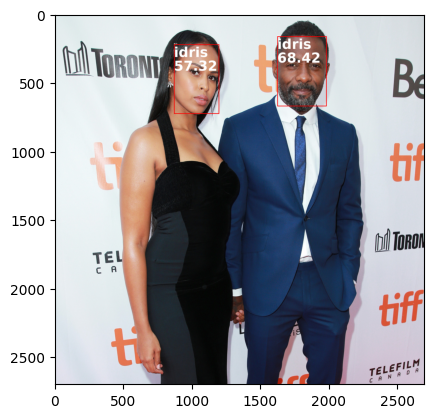

In [65]:
len(predictions)
print(predictions)

fontsize = 100
system_fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
#print(system_fonts)
font = ImageFont.truetype("DejaVuSans-Bold.ttf", fontsize)

 # Draw each bounding box that was returned by the AI engine
draw = ImageDraw.Draw(im)
for object in predictions:
    label = object["userid"]
    conf  = object["confidence"]
    y_max = int(object["y_max"])
    y_min = int(object["y_min"])
    x_max = int(object["x_max"])
    x_min = int(object["x_min"])

    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline="red", width=5)
    draw.text((x_min, y_min), f"{label}", font=font)
    draw.text((x_min, y_min + fontsize), f"{round(conf*100.0, 2)}", font=font)

plt.imshow(im);

## Face list 
Get a list of the registered faces in CodeProject.AI Server

In [66]:
cpaiface.get_registered_faces()

['idris']

## Helper functions
The package provides helper functions for extracting info out of CodeProject.AI Server predictions.

Get recognised faces and their probability (%)

In [67]:
cpai.get_recognized_faces(predictions)

{'idris': 68.4}